# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
# Crie a matriz de design (e a matriz y) utilizando o Patsy
# Modelo em tip, explicada por sex, smoker, diner e net_bill.

y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [4]:
y

DesignMatrix with shape (244, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  4.71
  2.00
  3.12
  1.96
  3.23
  1.71
  5.00
  1.57
  3.00
  3.02
  3.92
  1.67
  3.71
  3.50
  3.35
  4.08
  2.75
  2.23
  7.58
  3.18
  2.34
  2.00
  2.00
  4.30
  3.00
  [214 rows omitted]
  Terms:
    'tip' (column 0)
  (to view full data, use np.asarray(this_obj))

In [5]:
# Remova as variáveis não significantes.

# criar o modelo a partir da matriz de design

modelo = sm.OLS(y, X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           2.64e-20
Time:                        07:46:50   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# de acordo com os valores de p, apenas net_bill é significativa

y, X = patsy.dmatrices('tip ~ net_bill', tips)

modelo = sm.OLS(y, X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           5.02e-23
Time:                        07:46:55   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# observe o gráfico de resíduos em função de net_bill

tips['res'] = modelo.resid # incluir os resíduos nos dados 
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,res
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,-1.908050
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,-0.532915
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.429969
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,-0.044125
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.195281
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11,2.293700
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18,-1.831920
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67,-1.383925
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07,-1.176990


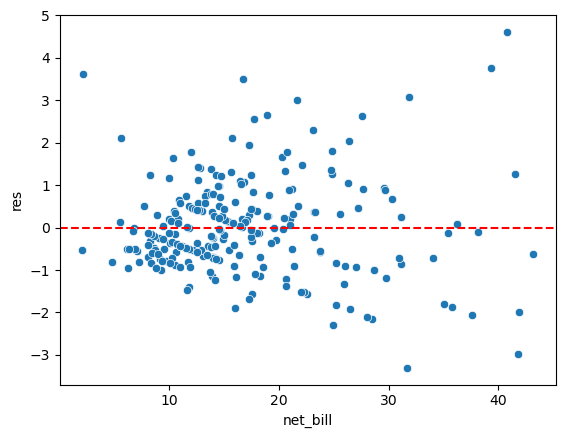

In [8]:
# gráfico de resíduos

sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [9]:
# transformar net_bill no log 

modelo1 = smf.ols('tip ~ np.log(net_bill)', tips).fit()
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           4.40e-20
Time:                        07:47:07   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

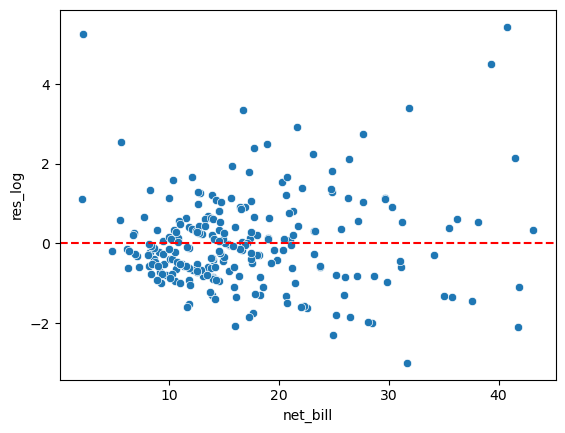

In [10]:
# incluir os resíduos do log nos dados e analisar gráfico de resíduos

tips['res_log'] = modelo1.resid 

sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [11]:
# transformar net_bill no polinômio 

modelo2 = smf.ols('tip ~ net_bill + np.power(net_bill, 2)', tips).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           4.96e-22
Time:                        07:47:19   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0743      0.353      3.039      0.003       0.378       1.770
net_bill                  0.1288      0.037      3.493      0.001       0.056       0.202
np.power(net_bill, 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

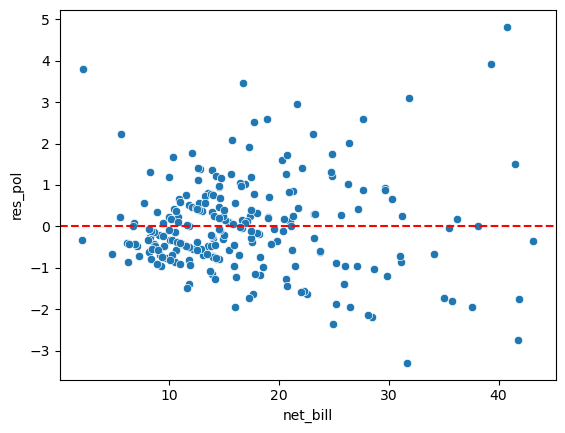

In [12]:
# incluir os resíduos do polinômio nos dados e analisar gráfico de resíduos

tips['res_pol'] = modelo2.resid 

sns.scatterplot(x = 'net_bill', y = 'res_pol', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

Analisando os gráficos de resíduos os dois modelos parecem semelhantes. Contudo, o r-quadrado do modelo log é aproximadamente 29% e o do modelo polinômio é 33%. Dessa forma, o modelo polinômio explica melhor o fenômeno. 

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [13]:
# Crie a matriz de design (e a matriz y) utilizando o Patsy
# Modelo no log de tip, explicado por sex, smoker, diner e net_bill.

y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', tips)

In [14]:
# Remova as variáveis não significantes

modelo = sm.OLS(y, X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           1.21e-18
Time:                        07:47:42   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# de acordo com os valores de p, apenas net_bill é significativa

y, X = patsy.dmatrices('np.log(tip) ~ net_bill', tips)

modelo = sm.OLS(y, X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           2.60e-21
Time:                        07:47:46   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

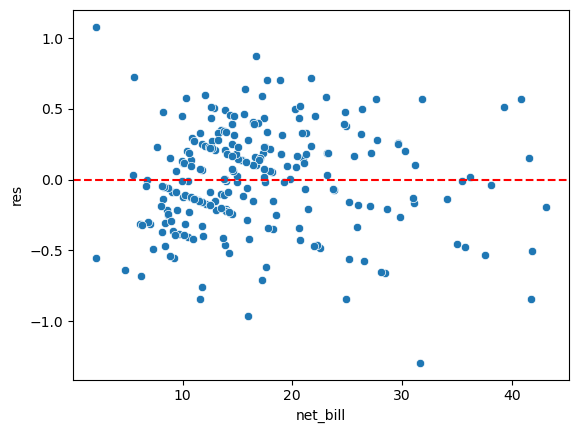

In [16]:
# Observe o gráfico de resíduos em função de net_bill

tips['res'] = modelo.resid # incluir os resíduos nos dados 

sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [17]:
# Tente transformar net_bill no log e um polinômio. Escolha o melhor modelo.

# log

modelo = smf.ols('np.log(tip) ~ np.log(net_bill)', tips).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           5.62e-22
Time:                        07:47:54   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

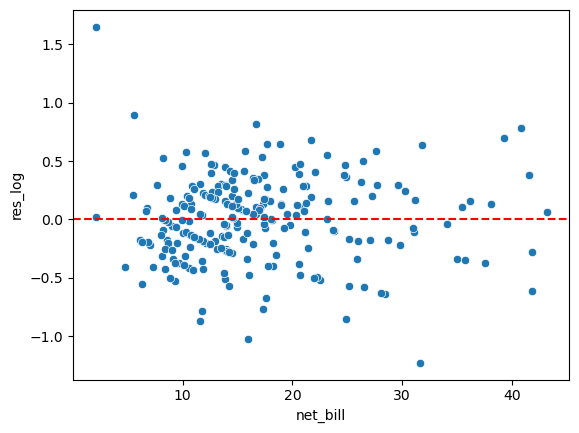

In [18]:
# Gráfico de resíduos 

tips['res_log'] = modelo.resid # incluir os resíduos nos dados 

sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [19]:
# Tente transformar net_bill no log e um polinômio. Escolha o melhor modelo.

# polinômio

modelo = smf.ols('np.log(tip) ~ net_bill + np.power(net_bill, 2)', tips).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     61.39
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           2.82e-22
Time:                        07:47:59   Log-Likelihood:                -93.026
No. Observations:                 244   AIC:                             192.1
Df Residuals:                     241   BIC:                             202.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1887      0.111      1.698      0.091      -0.030       0.408
net_bill                  0.0655      0.012      5.642      0.000       0.043       0.088
np.power(net_bill, 2)    -0.0008      0.000     -3.129      0.002      -0.001      -0.000
==============================================================================
Omnibus:                        5.692   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                7.934
Skew:                          -0.100   Prob(JB):                       0.0189
Kurtosis:                       3.860   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

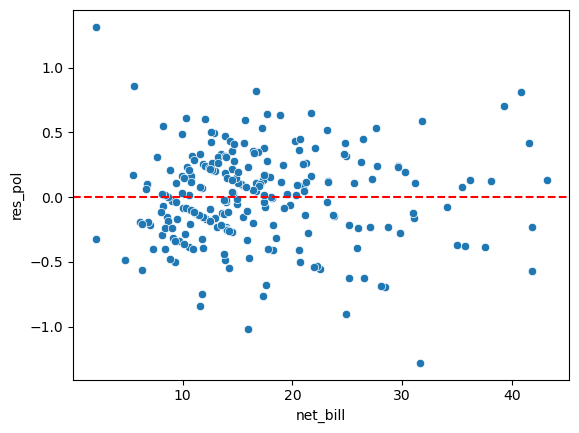

In [20]:
# Gráfico de resíduos 

tips['res_pol'] = modelo.resid # incluir os resíduos nos dados 

sns.scatterplot(x = 'net_bill', y = 'res_pol', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

Analisando os gráficos de resíduos os dois modelos parecem semelhantes. Contudo, o r-quadrado do modelo log é aproximadamente 32% e o do modelo polinômio é 33%. Dessa forma, o modelo polinômio explica melhor o fenômeno. 

In [21]:
# Do modelo final deste item, calcule o 𝑅2 na escala de tip (sem o log).

tips['pred_tip'] = np.exp(modelo.fittedvalues) # invertendo a operação de log, usando exponencial

tips[['pred_tip', 'tip']].corr().iloc[0,1]**2  # calculando r-quadrado por meio da correlação (r)

0.3290849111468199

In [ ]:
# Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

Os dois modelos apresentam coeficiente de determinação muito próximos. O deste item apresenta 32,9% e o do item anterior 33,4%. 

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [22]:
# carregando base de dados

renda = pd.read_csv('previsao_de_renda.csv')
renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


#### Ajuste um modelo de regressão linear simples para explicar ``renda`` como variável resposta, por ``tempo_emprego`` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.

In [23]:
reg = smf.ols('renda ~ tempo_emprego', renda).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        07:48:16   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# incluindo valores preditos no df

renda['renda_pred'] = reg.fittedvalues
renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,renda_pred
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24,3667.021680
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14,2897.704709
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98,4939.383452
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69,2996.295280
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37,6585.147305


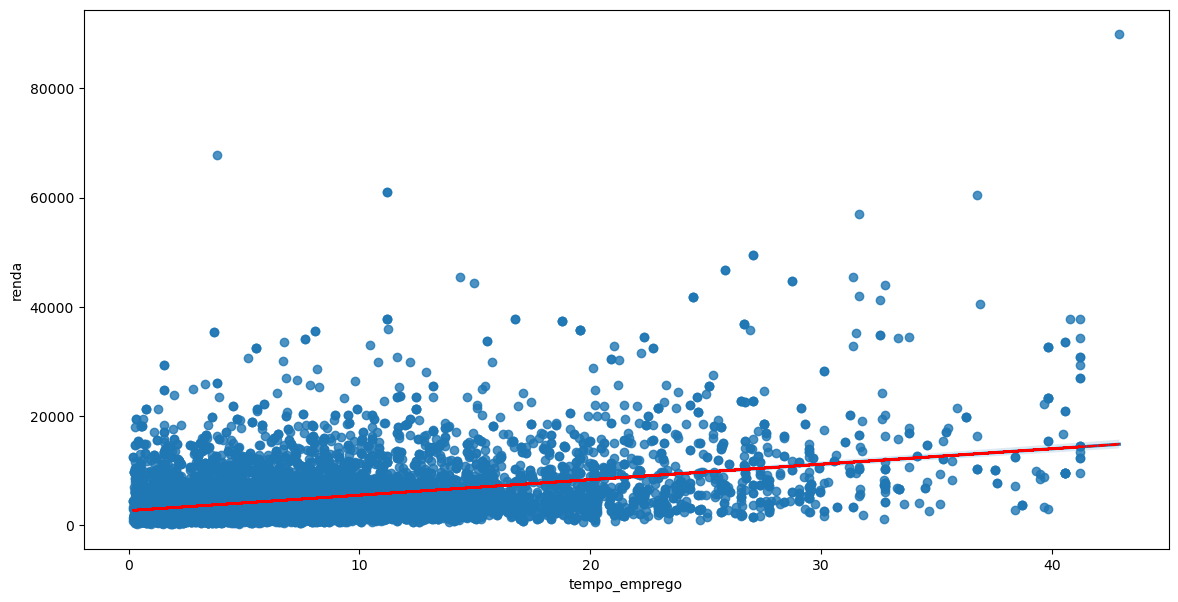

In [25]:
# gráfico com valores reais da renda e valores preditos

plt.figure(figsize=(14,7))

sns.regplot(x = 'tempo_emprego', y = 'renda', data = renda)
plt.plot(renda['tempo_emprego'], renda['renda_pred'], 'r,--')

#### Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?

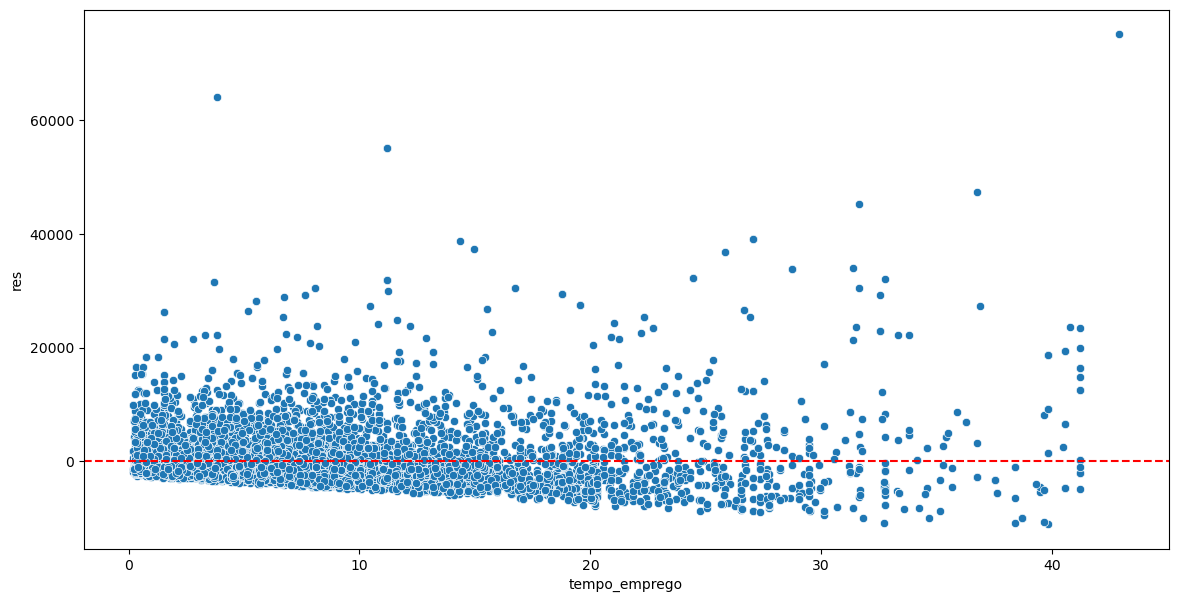

In [26]:
# Gráfico de resíduos 

renda['res'] = reg.resid # incluir os resíduos nos dados 

plt.figure(figsize=(14,7))
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = renda)
plt.axhline(y=0, color='r', linestyle='--')

Os resíduos não estão com um padrão definido, mas também não estão como o esperado. Estão mais concentrados quanto menor o tempo de emprego. 

In [27]:
# transformar tempo_emprego em log

reg_logx = smf.ols('np.log(renda) ~ np.log(tempo_emprego)', renda).fit()
reg_logx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1394.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):          2.85e-289
Time:                        07:48:36   Log-Likelihood:                -14269.
No. Observations:               12466   AIC:                         2.854e+04
Df Residuals:                   12464   BIC:                         2.856e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.7492      0.013    603.989      0.000       7.724       7.774
np.log(tempo_emprego)     0.2489      0.007     37.333      0.000       0.236       0.262
==============================================================================
Omnibus:                        9.367   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.357
Skew:                           0.062   Prob(JB):                      0.00929
Kurtosis:                       3.049   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

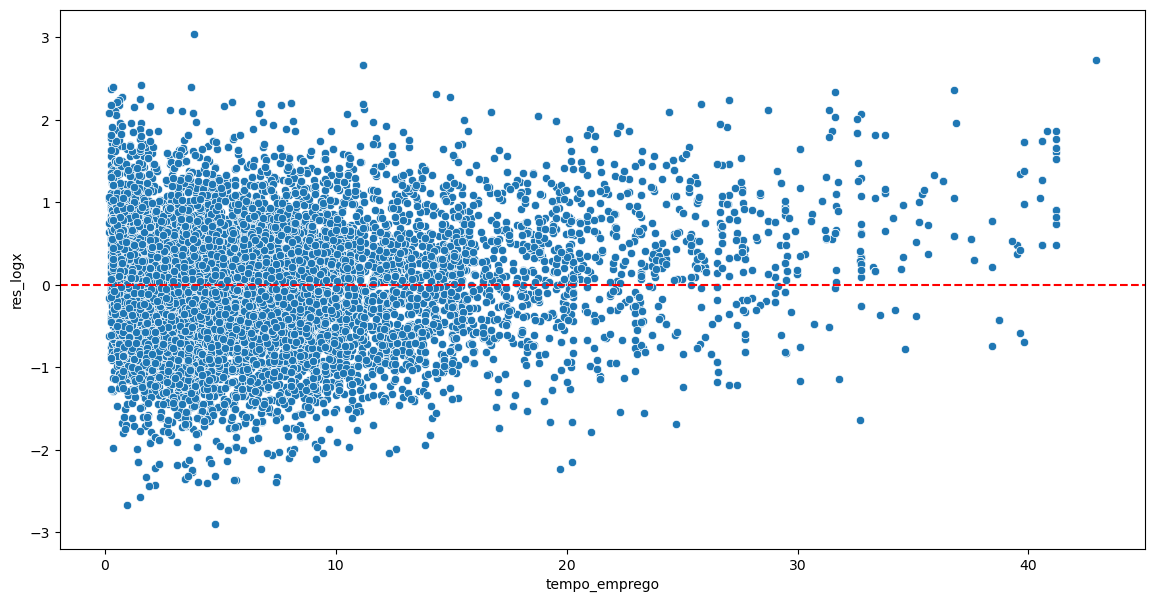

In [28]:
# Gráfico de resíduos 

renda['res_logx'] = reg_logx.resid # incluir os resíduos nos dados 

plt.figure(figsize=(14,7))
sns.scatterplot(x = 'tempo_emprego', y = 'res_logx', data = renda)
plt.axhline(y=0, color='r', linestyle='--')

In [29]:
# calcular r-quadrado 

renda['pred_ylog'] = np.exp(reg_logx.fittedvalues) # retirando o log dos valores preditos usando exponencial

renda[['pred_ylog', 'renda']].corr().iloc[0,1]**2 # calculando r-quadrado a partir da correlação (r)

0.10548785849371363

Transformar as duas variáveis em log fez o coeficiente de determinação cair de 15,5% para 10,5%, porém o gráfico de resíduos parece um pouco melhor. Ainda assim, a variância diminui ao longo do tempo de emprego. 

In [30]:
# transformar tempo_emprego em polinômio

reg_polx = smf.ols('renda ~ tempo_emprego + np.power(tempo_emprego, 2)', renda).fit()
reg_polx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     1258.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        07:48:49   Log-Likelihood:            -1.2240e+05
No. Observations:               12466   AIC:                         2.448e+05
Df Residuals:                   12463   BIC:                         2.448e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   3407.0877     81.730     41.687      0.000    3246.885    3567.291
tempo_emprego                 87.0286     15.488      5.619      0.000      56.669     117.388
np.power(tempo_emprego, 2)     7.2469      0.529     13.699      0.000       6.210       8.284
==============================================================================
Omnibus:                     9723.560   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           345767.284
Skew:                           3.454   Prob(JB):                         0.00
Kurtosis:                      27.859   Cond. No.                         468.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

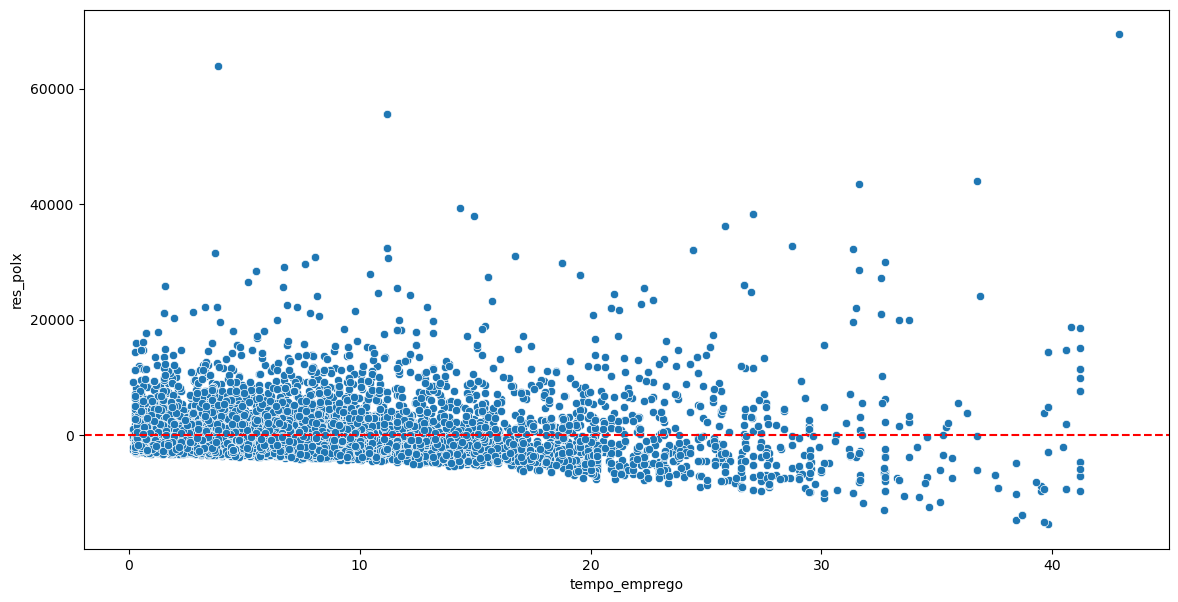

In [31]:
# Gráfico de resíduos 

renda['res_polx'] = reg_polx.resid # incluir os resíduos nos dados 

plt.figure(figsize=(14,7))
sns.scatterplot(x = 'tempo_emprego', y = 'res_polx', data = renda)
plt.axhline(y=0, color='r', linestyle='--')

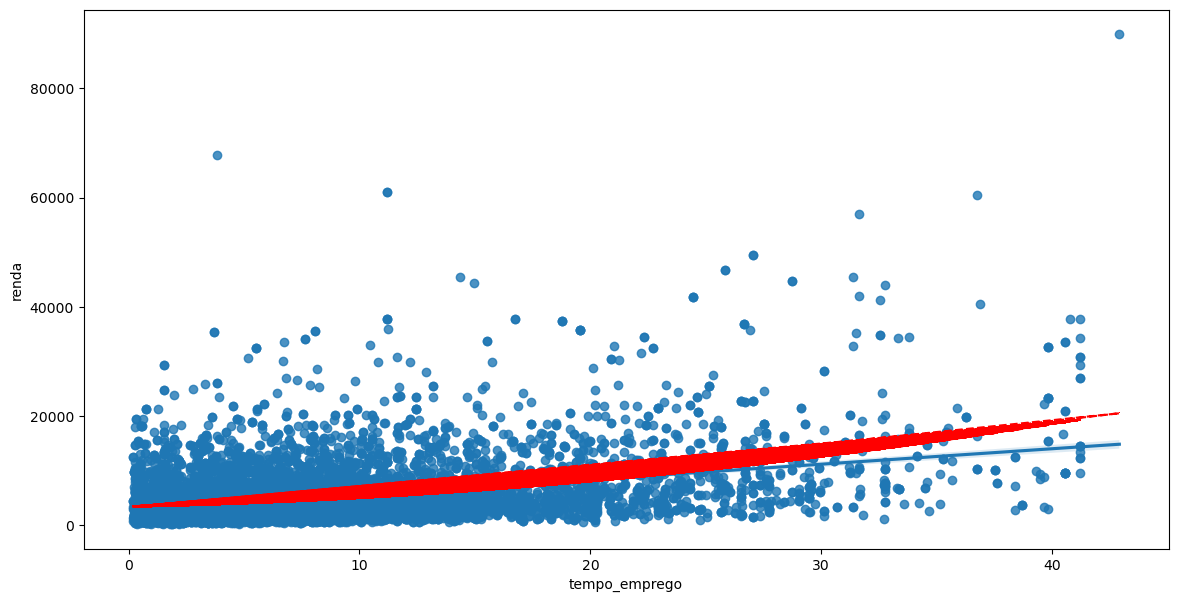

In [32]:
# gráfico com valores reais da renda e valores preditos

renda['renda_pred_polx'] = reg_polx.fittedvalues #incluindo valores preditos do df

plt.figure(figsize=(14,7))

sns.regplot(x = 'tempo_emprego', y = 'renda', data = renda)
plt.plot(renda['tempo_emprego'], renda['renda_pred_polx'], 'r,--')

Transformar ``tempo_emprego`` em polinômio melhorou o modelo em comparação às duas outras análises (coeficiente de determinação aumentou para 16,8% - era 15,5% para variáveis sem transformação e 10,1% para ``tempo_emprego`` e ``renda`` transformado em log). 

In [33]:
# transformar renda em log

reg_logy = smf.ols('np.log(renda) ~ tempo_emprego + np.power(tempo_emprego, 2)', renda).fit()
reg_logy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     1049.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        07:49:04   Log-Likelihood:                -13960.
No. Observations:               12466   AIC:                         2.793e+04
Df Residuals:                   12463   BIC:                         2.795e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.8092      0.014    572.799      0.000       7.782       7.836
tempo_emprego                  0.0444      0.003     17.191      0.000       0.039       0.049
np.power(tempo_emprego, 2)  1.665e-05   8.82e-05      0.189      0.850      -0.000       0.000
==============================================================================
Omnibus:                        3.079   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                3.046
Skew:                           0.033   Prob(JB):                        0.218
Kurtosis:                       3.037   Cond. No.                         468.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

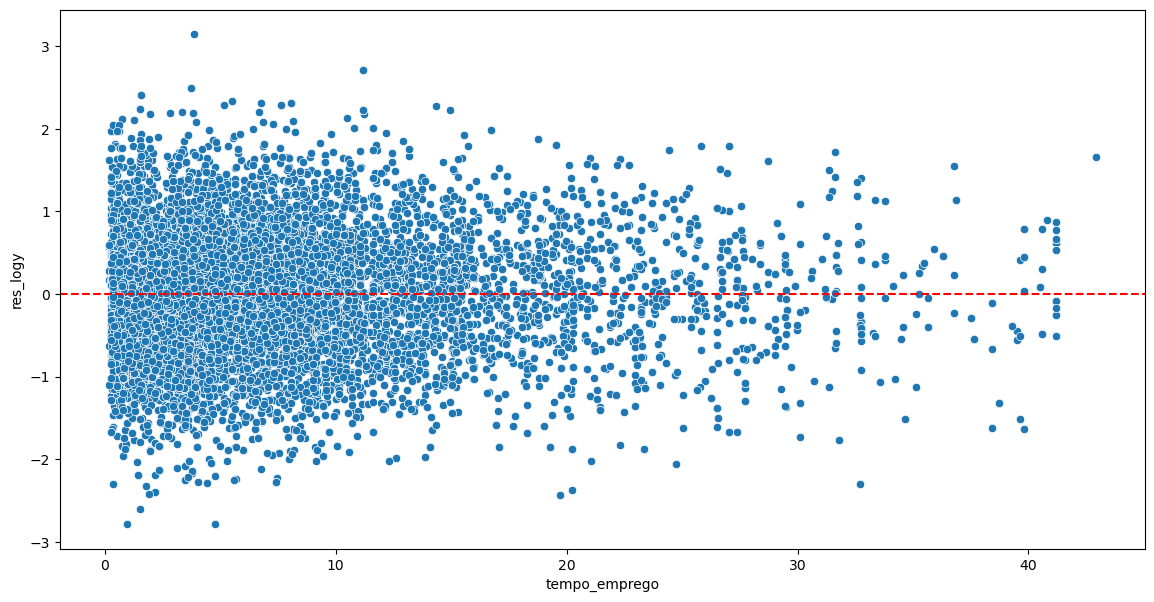

In [34]:
# Gráfico de resíduos 

renda['res_logy'] = reg_logy.resid # incluir os resíduos nos dados 

plt.figure(figsize=(14,7))
sns.scatterplot(x = 'tempo_emprego', y = 'res_logy', data = renda)
plt.axhline(y=0, color='r', linestyle='--')

In [35]:
# calcular r-quadrado 

renda['pred_y'] = np.exp(reg_logy.fittedvalues) # retirando o log dos valores preditos usando exponencial

renda[['pred_y', 'renda']].corr().iloc[0,1]**2 # calculando r-quadrado a partir da correlação (r)

0.16829286314786343

Tranformar a variável resposta (``renda``) em log e a variável explicativa (``tempo_emprego``) melhorou o modelo (o coeficiente de determinação continuou 16,8%) e melhorou também o gráfico de resíduos (apesar de não estar o melhor possível). Dessa forma, esse seria o melhor modelo. 

#### Ajuste um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) de acordo com as demais variáveis.

In [36]:
renda.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda', 'renda_pred', 'res',
       'res_logx', 'pred_ylog', 'res_polx', 'renda_pred_polx', 'res_logy',
       'pred_y'],
      dtype='object')

In [37]:
reg_mult = smf.ols('''renda ~ sexo 
                            + posse_de_veiculo
                            + posse_de_imovel
                            + qtd_filhos
                            + tipo_renda
                            + educacao 
                            + estado_civil
                            + tipo_residencia
                            + idade
                            + tempo_emprego 
                            + qt_pessoas_residencia
                            + mau''', renda).fit()
reg_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     141.0
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        07:49:19   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12440   BIC:                         2.442e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -275.6142   1675.894     -0.164      0.869   -3560.625    3009.396
sexo[T.M]                         2366.3093     88.116     26.855      0.000    2193.589    2539.030
posse_de_veiculo[T.True]           -79.2699     84.733     -0.936      0.350    -245.360      86.820
posse_de_imovel[T.True]            348.8880     83.443      4.181      0.000     185.326     512.450
tipo_renda[T.Bolsista]            -817.8078   2155.414     -0.379      0.704   -5042.752    3407.136
tipo_renda[T.Empresário]          1021.9829     90.151     11.336      0.000     845.273    1198.693
tipo_renda[T.Pensionista]         1744.5042   1458.879      1.196      0.232   -1115.124    4604.132
tipo_renda[T.Servidor público]     436.9302    130.517      3.348      0.001     181.097     692.764
educacao[T.Pós graduação]         2207.1796   1081.116      2.042      0.041      88.024    4326.335
educacao[T.Secundário]            -241.1182    437.804     -0.551      0.582   -1099.283     617.046
educacao[T.Superior completo]      338.3998    439.643      0.770      0.441    -523.369    1200.168
educacao[T.Superior incompleto]   -295.7849    471.028     -0.628      0.530   -1219.073     627.503
estado_civil[T.Separado]           144.4038    806.980      0.179      0.858   -1437.401    1726.209
estado_civil[T.Solteiro]           378.8127    792.270      0.478      0.633   -1174.159    1931.784
estado_civil[T.União]              -40.8760    143.778     -0.284      0.776    -322.703     240.951
estado_civil[T.Viúvo]              -38.3778    828.797     -0.046      0.963   -1662.949    1586.193
tipo_residencia[T.Casa]           -356.3831    328.636     -1.084      0.278   -1000.561     287.795
tipo_residencia[T.Com os pais]    -641.1830    368.536     -1.740      0.082   -1363.571      81.204
tipo_residencia[T.Comunitário]    -577.9834    634.095     -0.912      0.362   -1820.907     664.940
tipo_residencia[T.Estúdio]        -976.1533    547.375     -1.783      0.075   -2049.093      96.786
tipo_residencia[T.Governamental]  -883.4601    397.305     -2.224      0.026   -1662.240    -104.680
mau[T.True]                        -19.3616    255.885     -0.076      0.940    -520.935     482.212
qtd_filhos                        -242.7458    790.085     -0.307      0.759   -1791.435    1305.943
idade                               29.8762      4.808      6.213      0.000      20.451      39.301
tempo_emprego                      299.3139      6.146     48.700      0.000     287.267     311.361
qt_pessoas_residencia              308.7311    788.615      0.391      0.695   -1237.077    1854.539
==============================================================================
Omnibus:                    10075.338   Durbin-Watson:                   2.

In [38]:
reg_mult_log = smf.ols('''np.log(renda) ~ sexo 
                                    + posse_de_veiculo
                                    + posse_de_imovel
                                    + qtd_filhos
                                    + tipo_renda
                                    + educacao 
                                    + estado_civil
                                    + tipo_residencia
                                    + idade
                                    + tempo_emprego 
                                    + qt_pessoas_residencia
                                    + mau''', renda).fit()
reg_mult_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     158.7
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        07:49:28   Log-Likelihood:                -13204.
No. Observations:               12466   AIC:                         2.646e+04
Df Residuals:                   12440   BIC:                         2.665e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.2007      0.272     26.484      0.000       6.668       7.734
sexo[T.M]                            0.4815      0.014     33.681      0.000       0.453       0.510
posse_de_veiculo[T.True]            -0.0014      0.014     -0.104      0.917      -0.028       0.026
posse_de_imovel[T.True]              0.0847      0.014      6.260      0.000       0.058       0.111
tipo_renda[T.Bolsista]              -0.0499      0.350     -0.143      0.887      -0.735       0.636
tipo_renda[T.Empresário]             0.1787      0.015     12.217      0.000       0.150       0.207
tipo_renda[T.Pensionista]            0.4099      0.237      1.732      0.083      -0.054       0.874
tipo_renda[T.Servidor público]       0.0949      0.021      4.482      0.000       0.053       0.136
educacao[T.Pós graduação]            0.5496      0.175      3.133      0.002       0.206       0.893
educacao[T.Secundário]               0.0166      0.071      0.233      0.816      -0.123       0.156
educacao[T.Superior completo]        0.1134      0.071      1.590      0.112      -0.026       0.253
educacao[T.Superior incompleto]     -0.0090      0.076     -0.117      0.907      -0.159       0.141
estado_civil[T.Separado]            -0.0395      0.131     -0.302      0.763      -0.296       0.217
estado_civil[T.Solteiro]             0.0213      0.129      0.166      0.868      -0.231       0.273
estado_civil[T.União]               -0.0256      0.023     -1.098      0.272      -0.071       0.020
estado_civil[T.Viúvo]               -0.0377      0.134     -0.280      0.779      -0.301       0.226
tipo_residencia[T.Casa]              0.0146      0.053      0.274      0.784      -0.090       0.119
tipo_residencia[T.Com os pais]      -0.0578      0.060     -0.967      0.334      -0.175       0.059
tipo_residencia[T.Comunitário]       0.0571      0.103      0.555      0.579      -0.145       0.259
tipo_residencia[T.Estúdio]          -0.1093      0.089     -1.231      0.218      -0.283       0.065
tipo_residencia[T.Governamental]    -0.0567      0.064     -0.880      0.379      -0.183       0.070
mau[T.True]                         -0.0323      0.042     -0.778      0.437      -0.114       0.049
qtd_filhos                           0.0047      0.128      0.037      0.971      -0.247       0.256
idade                                0.0052      0.001      6.628      0.000       0.004       0.007
tempo_emprego                        0.0482      0.001     48.349      0.000       0.046       0.050
qt_pessoas_residencia                0.0114      0.128      0.089      0.929      -0.239       0.262
==============================================================================
Omnibus:                        1.207   Durbin-Watson:                   2.

In [39]:
# calcular r-quadrado 

renda['pred_mult_log'] = np.exp(reg_mult_log.fittedvalues) # retirando o log dos valores preditos usando exponencial

renda[['pred_mult_log', 'renda']].corr().iloc[0,1]**2 # calculando r-quadrado a partir da correlação (r)

0.2434971072244125

A regressão múltipla em relação à variável ``renda`` sem transformação apresenta coeficiente de determinação de 22,1%. Já a mesma regressão múltipla em relação à variável transformada em log apresenta coeficiente de 24,3%.

#### Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros

De acordo com o valor de p (menor de 0.05) as seguintes variáveis não são significativas e foram retiradas: ``posse_de_veiculo``, ``tipo_renda``, ``educacao``, ``estado_civil``, ``tipo_residencia``, ``mau``, ``qtd_filhos``, ``qt_pessoas_residencia``.

In [40]:
reg_mult_final = smf.ols('''np.log(renda) ~ sexo
                                            + posse_de_imovel
                                            + idade
                                            + tempo_emprego''', renda).fit()
reg_mult_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     907.7
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        07:49:36   Log-Likelihood:                -13335.
No. Observations:               12466   AIC:                         2.668e+04
Df Residuals:                   12461   BIC:                         2.672e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.3732      0.030    243.856      0.000       7.314       7.432
sexo[T.M]                   0.4742      0.013     35.424      0.000       0.448       0.500
posse_de_imovel[T.True]     0.1018      0.013      7.649      0.000       0.076       0.128
idade                       0.0043      0.001      5.958      0.000       0.003       0.006
tempo_emprego               0.0479      0.001     48.283      0.000       0.046       0.050
==============================================================================
Omnibus:                        1.296   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.523   Jarque-Bera (JB):                1.272
Skew:                           0.011   Prob(JB):                        0.529
Kurtosis:                       3.045   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# calcular r-quadrado 

renda['pred_mult_final'] = np.exp(reg_mult_final.fittedvalues) # retirando o log dos valores preditos usando exponencial

renda[['pred_mult_final', 'renda']].corr().iloc[0,1]**2 # calculando r-quadrado a partir da correlação (r)

0.2270854993719566

In [42]:
reg_mult_final1 = smf.ols('''np.log(renda) ~ sexo
                                            + posse_de_imovel
                                            + idade
                                            + educacao
                                            + tipo_renda
                                            + tempo_emprego''', renda).fit()
reg_mult_final1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     328.5
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        07:49:41   Log-Likelihood:                -13215.
No. Observations:               12466   AIC:                         2.646e+04
Df Residuals:                   12453   BIC:                         2.655e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           7.2288      0.076     95.409      0.000       7.080       7.377
sexo[T.M]                           0.4852      0.013     36.496      0.000       0.459       0.511
posse_de_imovel[T.True]             0.0959      0.013      7.258      0.000       0.070       0.122
educacao[T.Pós graduação]           0.5752      0.175      3.283      0.001       0.232       0.919
educacao[T.Secundário]              0.0274      0.071      0.387      0.699      -0.111       0.166
educacao[T.Superior completo]       0.1243      0.071      1.747      0.081      -0.015       0.264
educacao[T.Superior incompleto]     0.0009      0.076      0.012      0.990      -0.148       0.150
tipo_renda[T.Bolsista]             -0.0446      0.350     -0.127      0.899      -0.730       0.641
tipo_renda[T.Empresário]            0.1778      0.015     12.186      0.000       0.149       0.206
tipo_renda[T.Pensionista]           0.3880      0.233      1.664      0.096      -0.069       0.845
tipo_renda[T.Servidor público]      0.0941      0.021      4.455      0.000       0.053       0.135
idade                               0.0048      0.001      6.602      0.000       0.003       0.006
tempo_emprego                       0.0484      0.001     48.683      0.000       0.046       0.050
==============================================================================
Omnibus:                        0.894   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.861
Skew:                          -0.012   Prob(JB):                        0.650
Kurtosis:                       3.033   Cond. No.                     2.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
# calcular r-quadrado 

renda['pred_mult_final1'] = np.exp(reg_mult_final1.fittedvalues) # retirando o log dos valores preditos usando exponencial

renda[['pred_mult_final1', 'renda']].corr().iloc[0,1]**2 # calculando r-quadrado a partir da correlação (r)

0.24211757050433264

Incluindo ``educacao`` e ``tipo_renda``, variáveis que são significativas para alguns subtipos mas não para todos, o coeficiente de determinação sobe de 22,7% para 24,2%.

#### Faça uma análise de resíduos. Avalie a qualidade do ajuste.

#### 1. Para regressão com as variáveis explicativas: ``sexo``, ``posse_de_imovel``, ``idade`` e ``tempo_emprego``

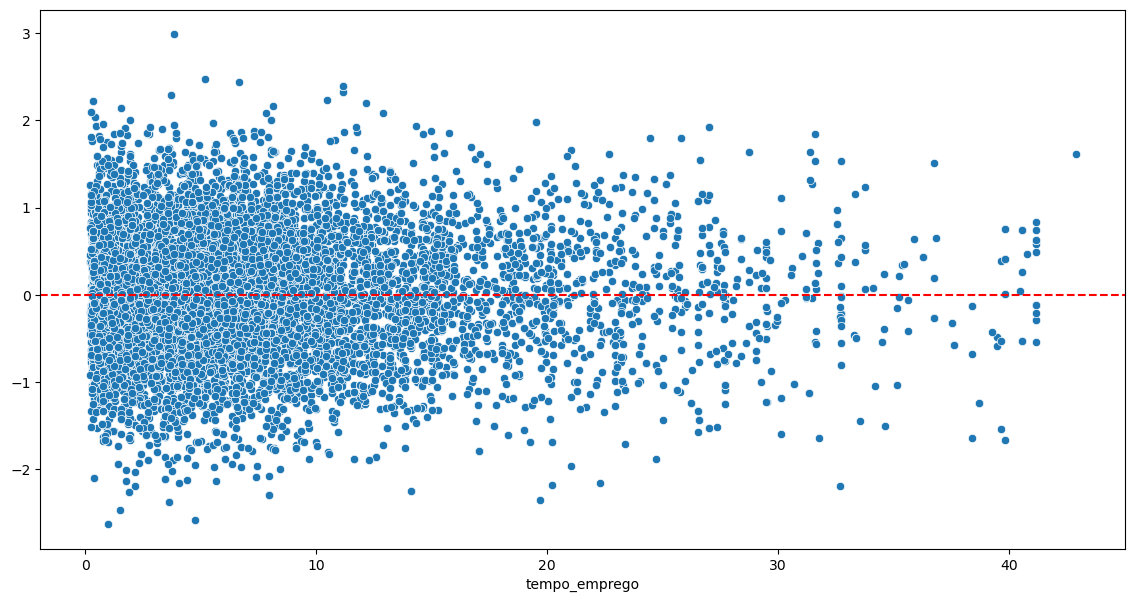

In [54]:
# gráfico de resíduos para tempo_emprego

plt.figure(figsize=(14,7))
sns.scatterplot(x = 'tempo_emprego', y = reg_mult_final.resid, data = renda)
plt.axhline(y=0, color='r', linestyle='--')

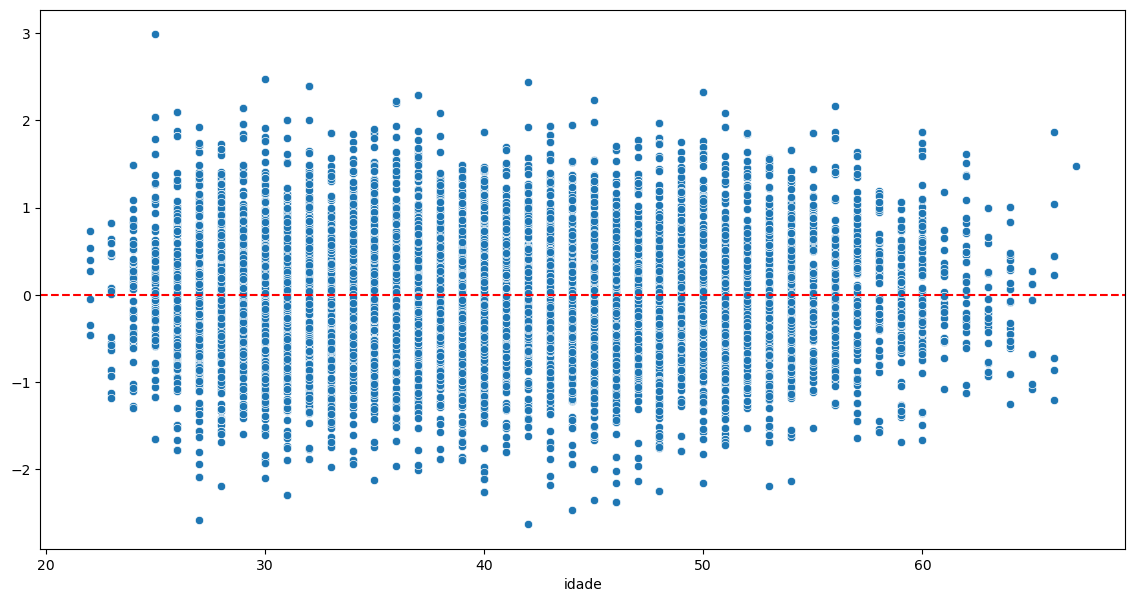

In [55]:
# gráfico de resíduos para idade

plt.figure(figsize=(14,7))
sns.scatterplot(x = 'idade', y = reg_mult_final.resid, data = renda)
plt.axhline(y=0, color='r', linestyle='--')

<Axes: xlabel='sexo'>

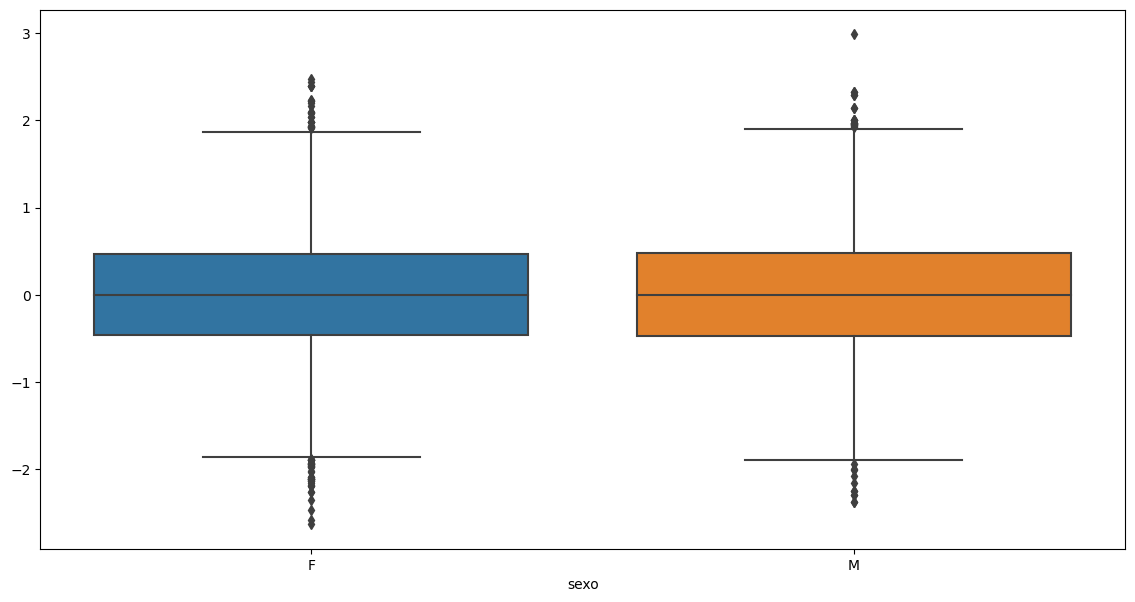

In [57]:
# gráfico de resíduos para sexo

plt.figure(figsize=(14,7))
sns.boxplot(x = 'sexo', y = reg_mult_final.resid, data = renda)

<Axes: xlabel='posse_de_imovel'>

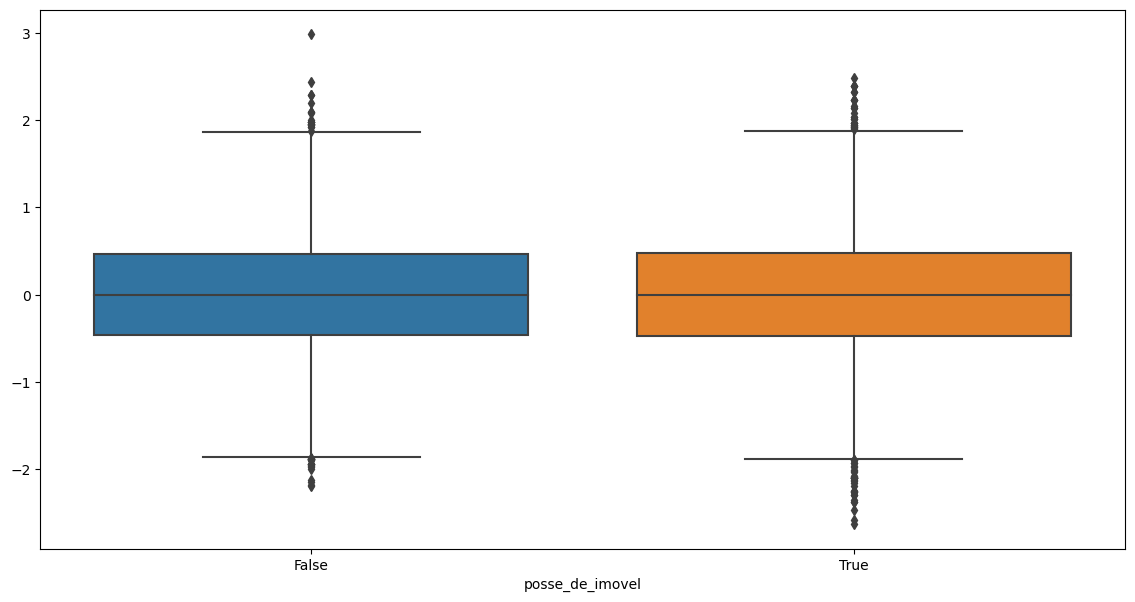

In [58]:
# gráfico de resíduos para posse_de_imovel

plt.figure(figsize=(14,7))
sns.boxplot(x = 'posse_de_imovel', y = reg_mult_final.resid, data = renda)

#### 1. Para regressão com as variáveis explicativas: ``sexo``, ``posse_de_imovel``, ``idade``, ``tempo_emprego``, ``educacao`` e ``tipo_renda``.


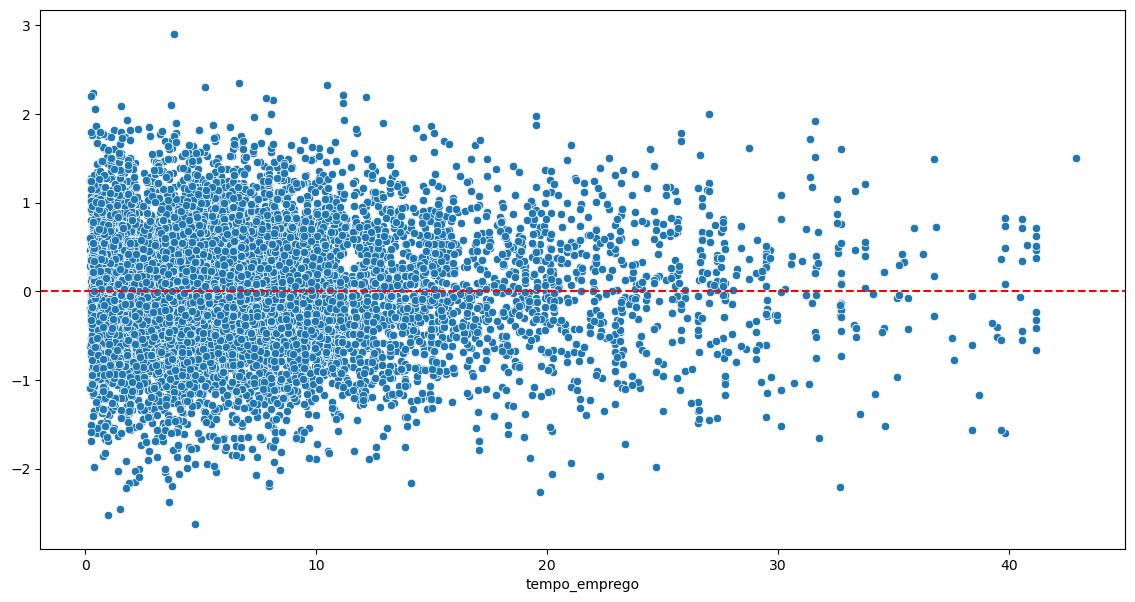

In [63]:
# gráfico de resíduos para tempo_emprego

plt.figure(figsize=(14,7))
sns.scatterplot(x = 'tempo_emprego', y = reg_mult_final1.resid, data = renda)
plt.axhline(y=0, color='r', linestyle='--')

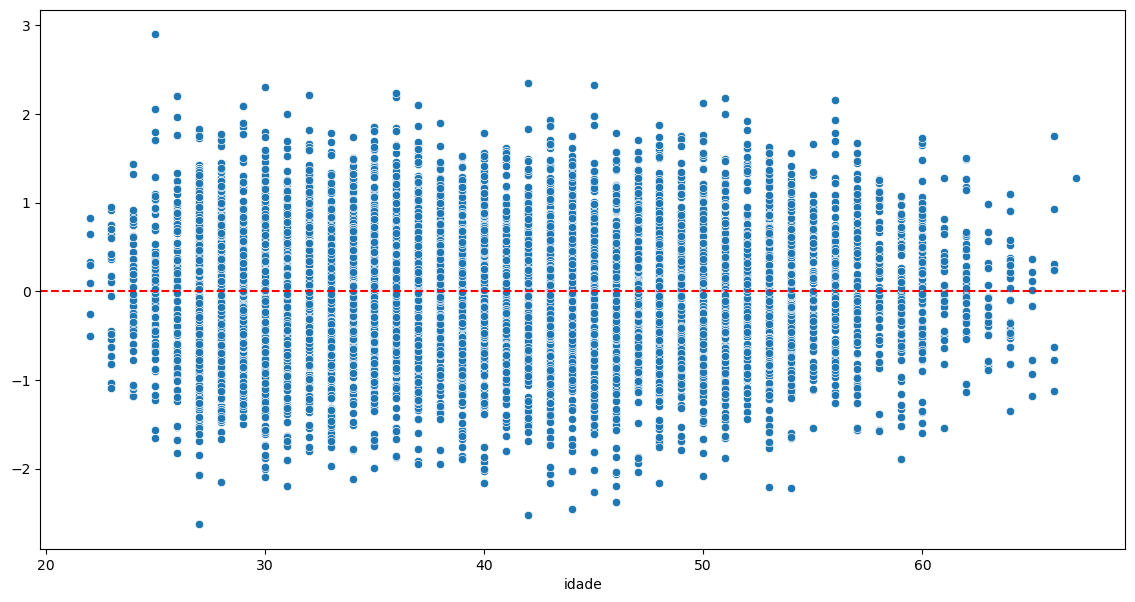

In [64]:
# gráfico de resíduos para idade

plt.figure(figsize=(14,7))
sns.scatterplot(x = 'idade', y = reg_mult_final1.resid, data = renda)
plt.axhline(y=0, color='r', linestyle='--')

<Axes: xlabel='sexo'>

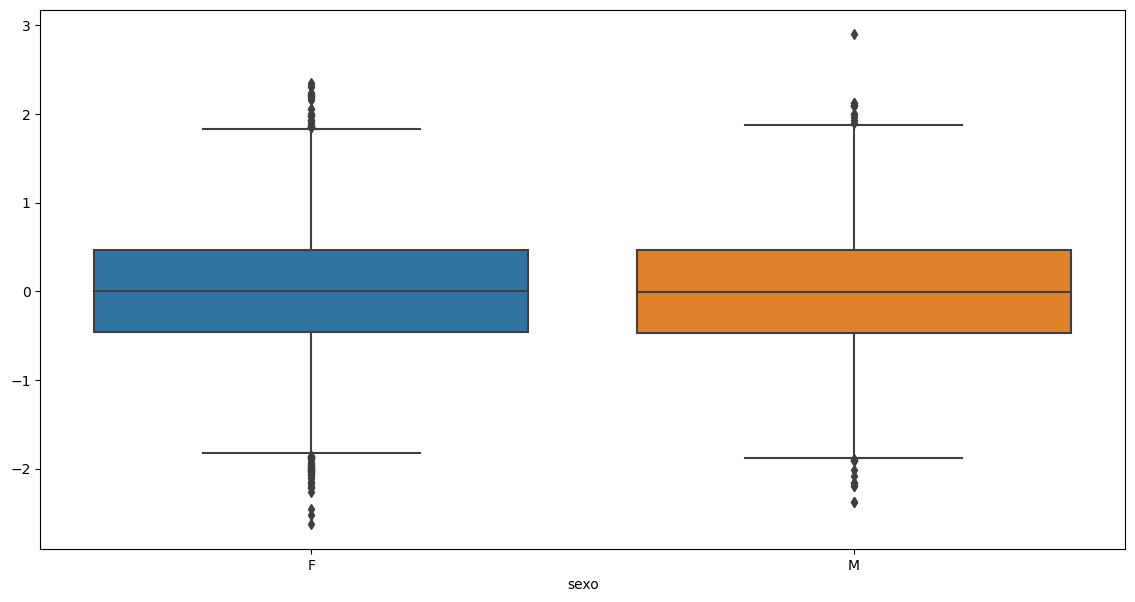

In [65]:
# gráfico de resíduos para sexo

plt.figure(figsize=(14,7))
sns.boxplot(x = 'sexo', y = reg_mult_final1.resid, data = renda)

<Axes: xlabel='posse_de_imovel'>

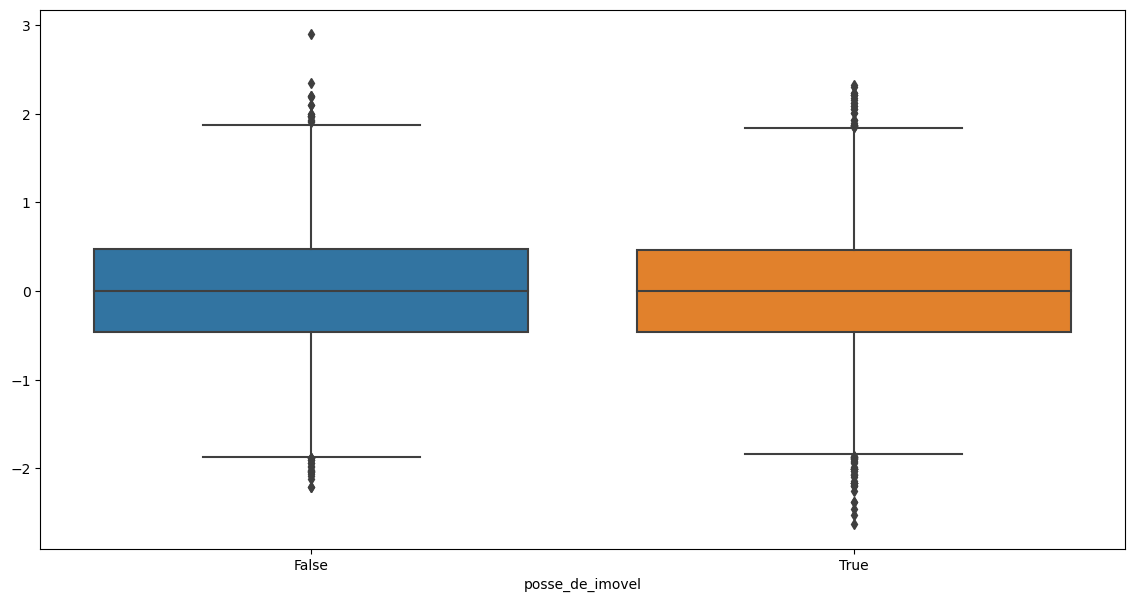

In [66]:
# gráfico de resíduos para posse_de_imovel

plt.figure(figsize=(14,7))
sns.boxplot(x = 'posse_de_imovel', y = reg_mult_final1.resid, data = renda)

<Axes: xlabel='educacao'>

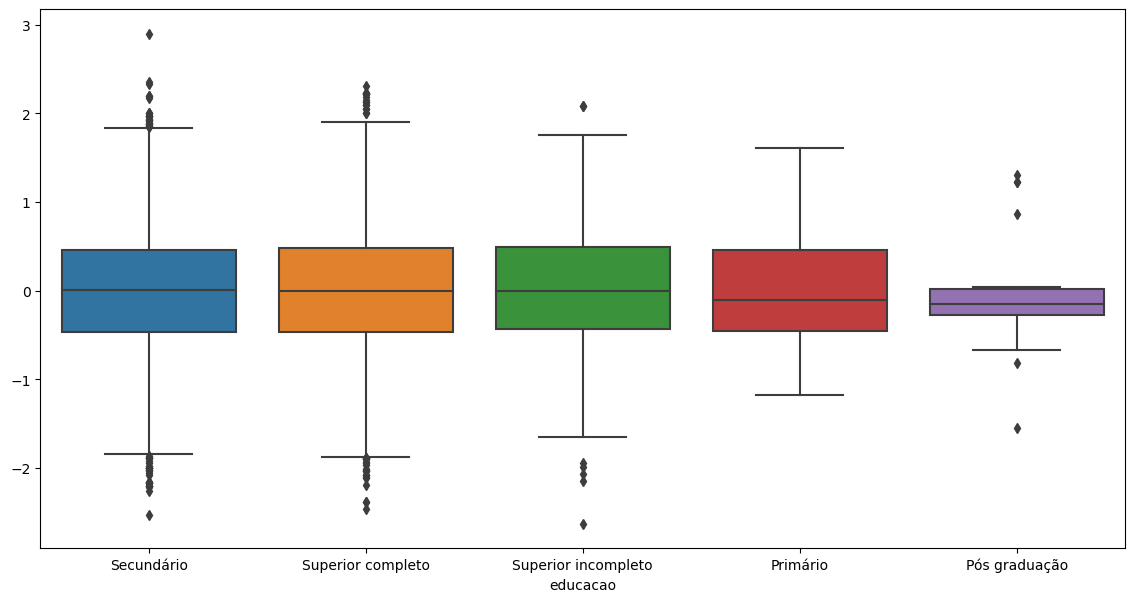

In [67]:
# gráfico de resíduos para educacao

plt.figure(figsize=(14,7))
sns.boxplot(x = 'educacao', y = reg_mult_final1.resid, data = renda)

<Axes: xlabel='tipo_renda'>

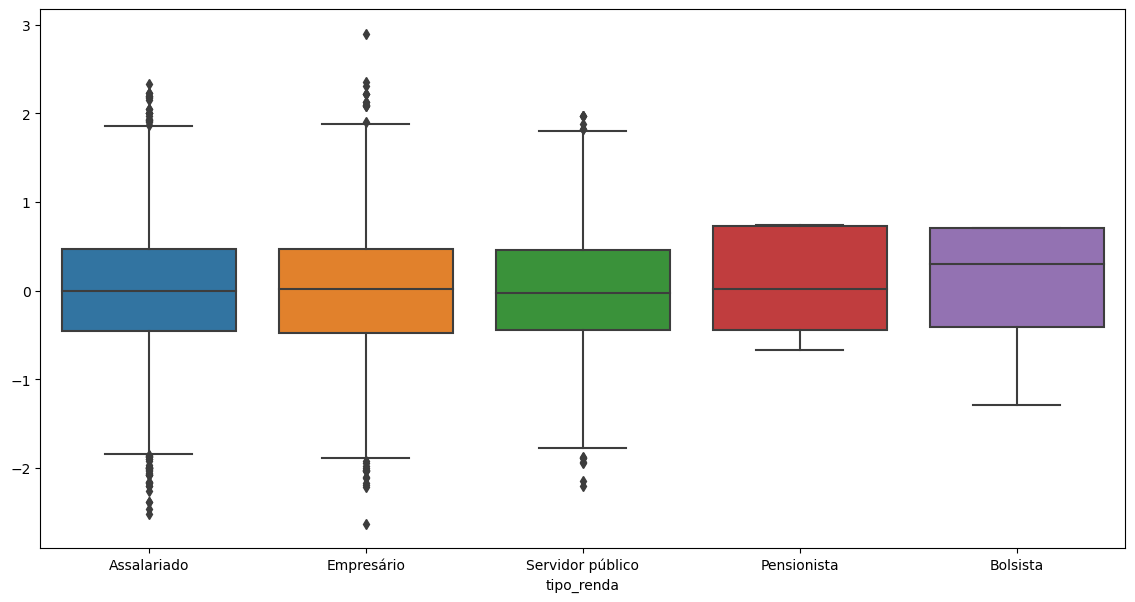

In [68]:
# gráfico de resíduos para tipo_renda

plt.figure(figsize=(14,7))
sns.boxplot(x = 'tipo_renda', y = reg_mult_final1.resid, data = renda)

Nos dois casos as análises de resíduos foram semelhantes. Não foram percebidos padrões muito aparentes (apenas em relação à ``tempo_emprego`` os dados estão mais concentrados à esquerda do gráfico, mas a variância parece relativamente homogênea). 
As variáveis ``educacao`` e ``tipo_renda`` não apresentaram padrões e poderiam estar fora do modelo (como em ``reg_mult_final``), mas o coeficiente de determinação de ``reg_mult_final1`` é maior, explicando melhor o fenômeno. 